In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

Wczytanie i oczyszczenie danych

In [135]:
xls = pd.ExcelFile("dane.xlsx")
df_raw = xls.parse("Arkusz1", skiprows=2)
df = df_raw.iloc[:, 1:4]
df.columns = ["Powiat", "Mezczyzni", "Kobiety"]
df = df.dropna()
df["Mezczyzni"] = pd.to_numeric(df["Mezczyzni"], errors='coerce')
df["Kobiety"] = pd.to_numeric(df["Kobiety"], errors='coerce')
df = df.dropna()


Funkcje do metryk

In [136]:
def srednia_ucinana(x, alpha=0.1):
    return stats.trim_mean(x, proportiontocut=alpha)

def srednia_winsorowska(x, alpha=0.1):
    return stats.mstats.winsorize(x, limits=alpha).mean()

def odchylenie_przecietne(x):
    return np.mean(np.abs(x - np.mean(x)))

def wsp_zmiennosci(x):
    return np.std(x, ddof=1) / np.mean(x) * 100

def kurtoza(x):
    n = len(x)
    k1 = np.mean((x - np.mean(x))**4) / (np.mean((x - np.mean(x))**2))**2
    return ((n - 1)/((n - 2)*(n - 3))) * ((n + 1) * k1 - 3*(n - 1)) + 3

Obliczenia dla każdej grupy

In [137]:
for group in ["Mezczyzni", "Kobiety"]:
    print(f"--- {group} ---")
    x = df[group].values
    print("Średnia arytmetyczna:", np.mean(x))
    print("Średnia harmoniczna:", stats.hmean(x))
    print("Średnia geometryczna:", stats.gmean(x))
    print("Średnia ucinana:", srednia_ucinana(x))
    print("Średnia winsorowska:", srednia_winsorowska(x))
    print("Mediana:", np.median(x))
    print("Kwartyle:", np.percentile(x, [25, 50, 75]))
    print("Dominanta (tryb):", stats.mode(x, keepdims=True).mode[0])
    print("Rozstęp:", np.max(x) - np.min(x))
    print("IQR:", stats.iqr(x))
    print("Wariancja:", np.var(x, ddof=1))
    print("Odchylenie standardowe:", np.std(x, ddof=1))
    print("Odchylenie przeciętne:", odchylenie_przecietne(x))
    print("Współczynnik zmienności:", wsp_zmiennosci(x))
    print("Skośność:", stats.skew(x))
    print("Kurtoza:", kurtoza(x))
    print()


--- Mezczyzni ---
Średnia arytmetyczna: 7628.377105263157
Średnia harmoniczna: 7530.216849505989
Średnia geometryczna: 7576.469386106397
Średnia ucinana: 7475.067335526315
Średnia winsorowska: 7542.846868421051
Mediana: 7298.905
Kwartyle: [7008.1575 7298.905  7996.2125]
Dominanta (tryb): 6165.46
Rozstęp: 6586.999999999999
IQR: 988.0550000000003
Wariancja: 897752.0088190391
Odchylenie standardowe: 947.4977619071399
Odchylenie przeciętne: 691.6255235457062
Współczynnik zmienności: 12.420699040342656
Skośność: 1.8742114240679284
Kurtoza: 7.552403296864587

--- Kobiety ---
Średnia arytmetyczna: 6955.662315789474
Średnia harmoniczna: 6916.377285427524
Średnia geometryczna: 6934.936555638179
Średnia ucinana: 6855.030953947368
Średnia winsorowska: 6890.070763157893
Mediana: 6786.275
Kwartyle: [6630.69  6786.275 7086.83 ]
Dominanta (tryb): 6072.07
Rozstęp: 4678.09
IQR: 456.1399999999994
Wariancja: 325419.8381101903
Odchylenie standardowe: 570.4558160893711
Odchylenie przeciętne: 379.5825085872

WYKRESY

In [139]:
sns.set(style="whitegrid")

Boxplot

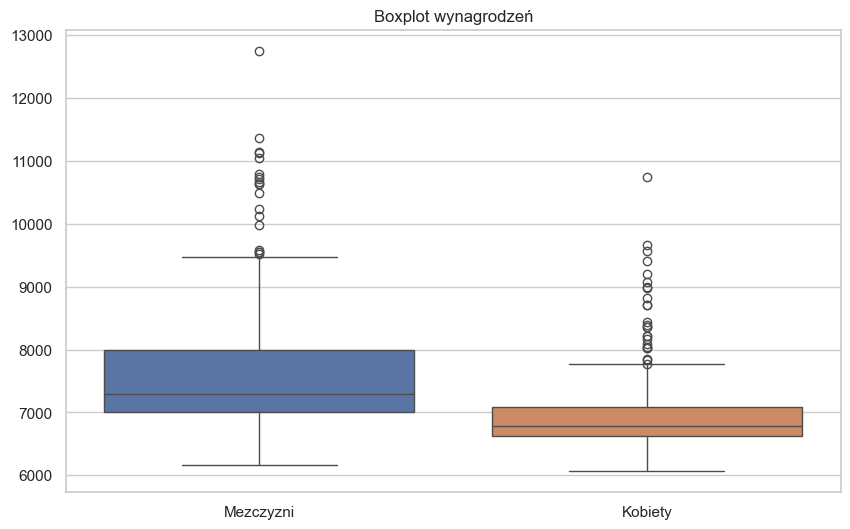

In [140]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Mezczyzni", "Kobiety"]])
plt.title("Boxplot wynagrodzeń")
plt.savefig("boxplot.png")
plt.show()

KDE

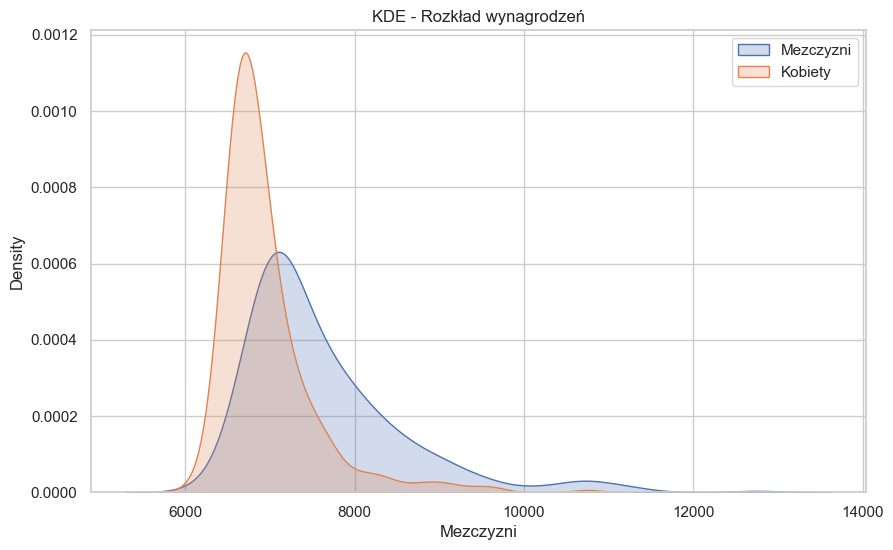

In [141]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Mezczyzni"], label="Mezczyzni", fill=True)
sns.kdeplot(df["Kobiety"], label="Kobiety", fill=True)
plt.title("KDE - Rozkład wynagrodzeń")
plt.legend()
plt.savefig("kde.png")
plt.show()

Histogramy

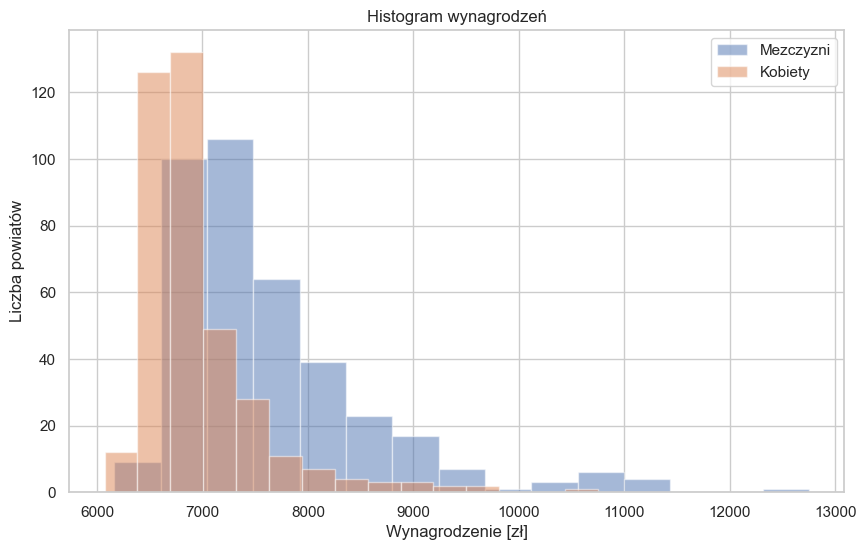

In [142]:
plt.figure(figsize=(10, 6))
plt.hist(df["Mezczyzni"], bins=15, alpha=0.5, label='Mezczyzni')
plt.hist(df["Kobiety"], bins=15, alpha=0.5, label='Kobiety')
plt.legend()
plt.title("Histogram wynagrodzeń")
plt.xlabel("Wynagrodzenie [zł]")
plt.ylabel("Liczba powiatów")
plt.savefig("histogram.png")
plt.show()

QQ-ploty

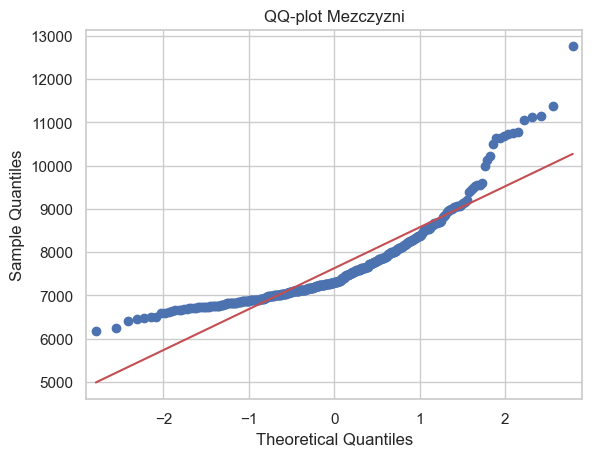

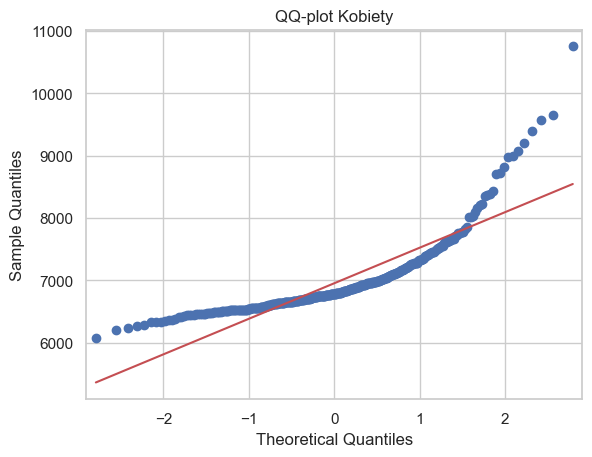

In [143]:
qqplot(df["Mezczyzni"], line='s')
plt.title("QQ-plot Mezczyzni")
plt.savefig("qq_mezczyzni.png")
plt.show()

qqplot(df["Kobiety"], line='s')
plt.title("QQ-plot Kobiety")
plt.savefig("qq_kobiety.png")
plt.show()

Średnie ucinane i winsorowskie

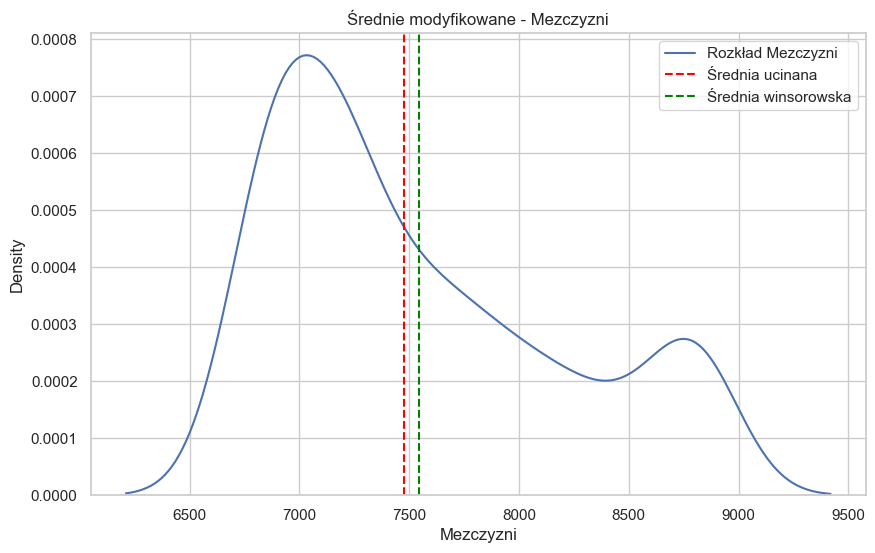

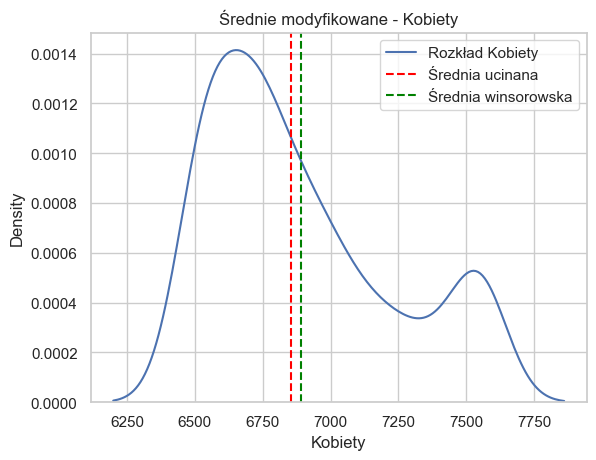

In [144]:
alpha = 0.1
plt.figure(figsize=(10,6))
cut_mean_m = srednia_ucinana(df["Mezczyzni"], alpha)
wins_mean_m = srednia_winsorowska(df["Mezczyzni"], alpha)
sns.kdeplot(df["Mezczyzni"], label="Rozkład Mezczyzni")
plt.axvline(cut_mean_m, color='red', linestyle='--', label="Średnia ucinana")
plt.axvline(wins_mean_m, color='green', linestyle='--', label="Średnia winsorowska")
plt.title("Średnie modyfikowane - Mezczyzni")
plt.legend()
plt.savefig("mean_mod_m.png")
plt.show()

cut_mean_k = srednia_ucinana(df["Kobiety"], alpha)
wins_mean_k = srednia_winsorowska(df["Kobiety"], alpha)
sns.kdeplot(df["Kobiety"], label="Rozkład Kobiety")
plt.axvline(cut_mean_k, color='red', linestyle='--', label="Średnia ucinana")
plt.axvline(wins_mean_k, color='green', linestyle='--', label="Średnia winsorowska")
plt.title("Średnie modyfikowane - Kobiety")
plt.legend()
plt.savefig("mean_mod_k.png")
plt.show()

Barplot różnic

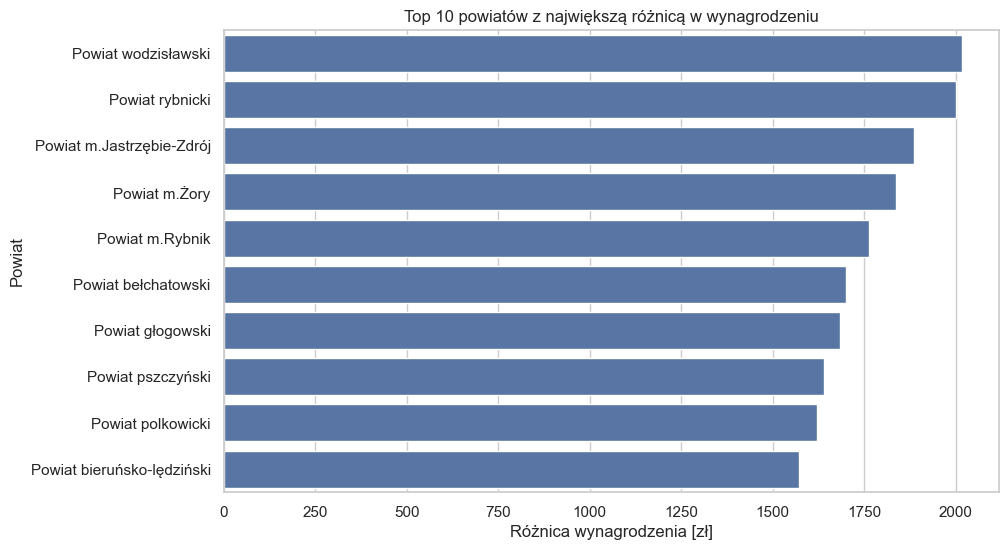

In [145]:
df["Różnica"] = df["Mezczyzni"] - df["Kobiety"]
top_diff = df.sort_values("Różnica", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y="Powiat", x="Różnica", data=top_diff)
plt.title("Top 10 powiatów z największą różnicą w wynagrodzeniu")
plt.xlabel("Różnica wynagrodzenia [zł]")
plt.ylabel("Powiat")
plt.savefig("roznice_barplot.png")
plt.show()

Dla obu grup – kobiet i mężczyzn – obliczono szereg miar statystycznych opisujących położenie, rozproszenie oraz kształt rozkładu wynagrodzeń.
Miary położenia:

Średnia arytmetyczna wynagrodzeń mężczyzn jest wyższa niż kobiet, co wskazuje na systematyczne różnice w płacach między płciami.

Mediana w obu przypadkach jest niższa od średniej, co sugeruje prawostronną asymetrię rozkładu (obecność powiatów z wyjątkowo wysokimi zarobkami).

Średnia ucinana i średnia winsorowska są niższe od klasycznej średniej, co wskazuje na wpływ obserwacji odstających (tzw. „outliers”) na wartość przeciętną.

Średnia geometryczna i harmoniczna są jeszcze niższe, co dodatkowo potwierdza niesymetryczny i rozciągnięty rozkład płac.

Miary zmienności:

Rozstęp i rozstęp międzykwartylowy (IQR) są wyraźnie większe u mężczyzn, co oznacza większe zróżnicowanie ich wynagrodzeń.

Odchylenie standardowe oraz wariancja są również wyższe u mężczyzn, co potwierdza większą niestabilność płac w tej grupie.

Odchylenie przeciętne i współczynnik zmienności również są wyższe u mężczyzn, co oznacza większą względną zmienność w stosunku do średniego wynagrodzenia.

Miary kształtu:

Skośność rozkładów jest dodatnia dla obu grup, ale wyższa u mężczyzn – co oznacza, że rozkład płac ma długi „ogon” w prawo.

Kurtoza przekracza wartość 3 (czyli tzw. rozkład normalny) – mamy do czynienia z rozkładami leptokurtycznymi, bardziej spiczastymi, z większym udziałem wartości skrajnych.

Podsumowanie:

Analiza wskazuje, że mężczyźni nie tylko zarabiają więcej, ale ich wynagrodzenia są również bardziej zróżnicowane i podatne na wartości odstające. W przypadku kobiet rozkład płac jest nieco bardziej spłaszczony i mniej zróżnicowany. W obu grupach występują istotne cechy asymetrii i koncentracji, które warto brać pod uwagę przy dalszej analizie ekonomicznej lub społecznej.